В парках Москвы 1 активность Тайцзицюань
Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                        


True

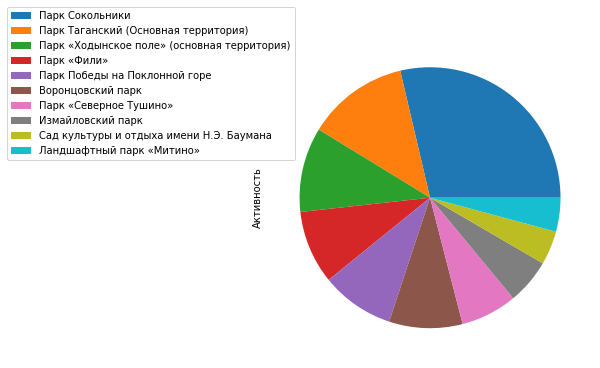

In [1]:
'''Используя данные по активностям в парках Москвы
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json
Создайте PDF отчет, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк
Сколько активностей Тайцзицюань есть в парках Москвы?

'''

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import binascii
import pdfkit
from jinja2 import Template
    
r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns = ["CourseName", "CoursesTimetable", "NameOfPark"]).fillna(value=0)
data['NameOfPark'] = [st['value'] for st in data['NameOfPark']]
data.columns = ["Активность", "Расписание", "Парк"]

print('В парках Москвы', len(data[data['Активность'] == 'Тайцзицюань']), 'активность Тайцзицюань')

data_count = data.reset_index().set_index("Парк")
data_count = data_count["Активность"].groupby("Парк").count().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(12,6))
area = fig.add_subplot(1, 1, 1)

data_count.plot.pie(ax = area, labels = ['']*10, label = "Активность", cmap = 'tab10')
plt.legend(data_count.index, bbox_to_anchor=(0,1.1,0.1,0))
img = BytesIO()
plt.savefig(img)

img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode("UTF-8")
    
pd.set_option('display.max_colwidth', 1000)

html = Template(open('html_files/park_activity.html', encoding="utf-8").read()).render(data={
    'image': img,
    'table': data.to_html()})

config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
    
pdfkit.from_string(html, 'park_activity.pdf',
                  configuration=config, options = options)